<a href="https://colab.research.google.com/github/TekyAms/Machine_learning/blob/main/Delhi_Regression_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet nous allons predire le prix des maisons dans la ville de Delhi en utilisans un modele de regression lineaire multiple.

In [3]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
# Chargement des données depuis un fichier CSV
house_delhi = pd.read_csv('/content/Delhi_data.csv')

In [5]:
house_delhi.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [6]:
house_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


# Analyse exploratoire des donnees

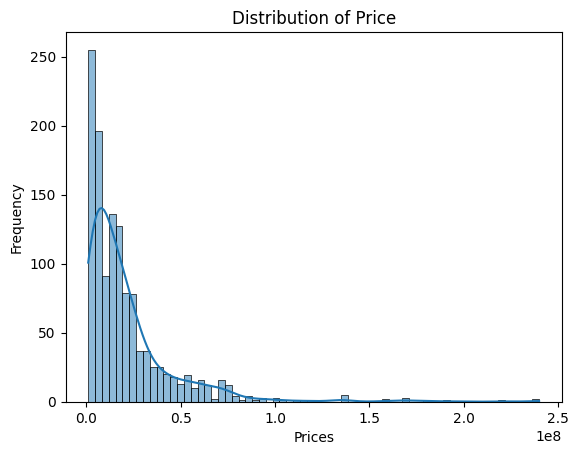

In [7]:
sns.histplot(house_delhi['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

In [8]:
house_delhi.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


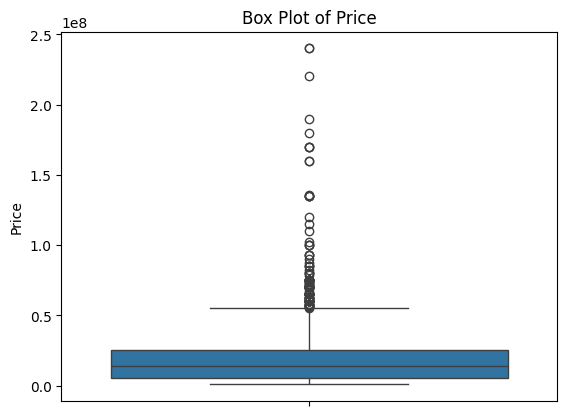

In [9]:
sns.boxplot(y=house_delhi['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

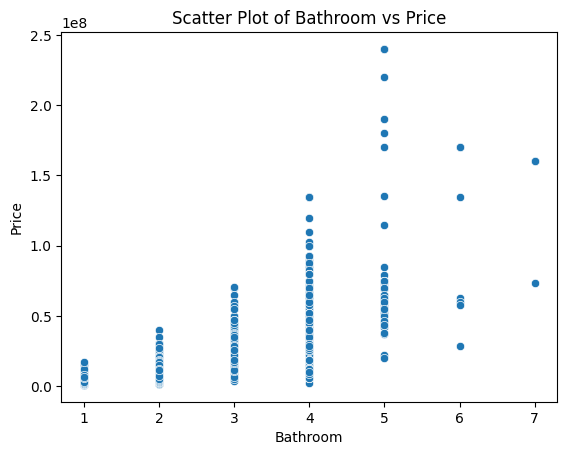

In [10]:
sns.scatterplot(x='Bathroom', y='Price', data=house_delhi)
plt.title('Scatter Plot of Bathroom vs Price')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()


In [11]:
house_delhi['Status'].values

array(['Ready_to_move', 'Ready_to_move', 'Ready_to_move', ...,
       'Ready_to_move', 'Ready_to_move', 'Ready_to_move'], dtype=object)

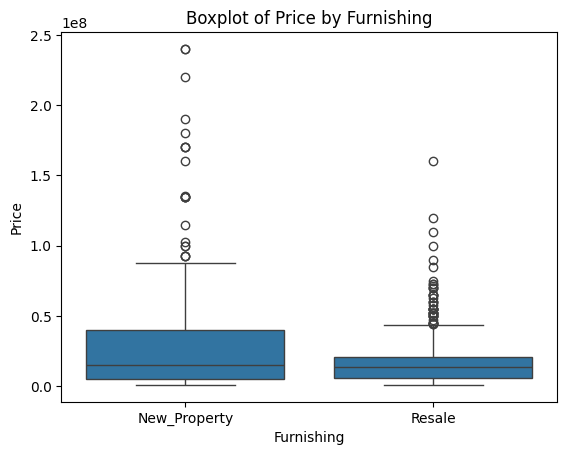

In [12]:
sns.boxplot(x='Transaction', y='Price', data=house_delhi)
plt.title('Boxplot of Price by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Price')
plt.show()

In [13]:
sub_delhi=house_delhi[['Area','Price','Bathroom','Furnishing','Transaction','Parking','Status']]

In [14]:
sub_delhi.isnull().sum()

,0
Area,0
Price,0
Bathroom,2
Furnishing,5
Transaction,0
Parking,33
Status,0


# Encodage des variables categorielles

In [15]:
# pour la variable status on utilise la methode dummies
status_dummies=pd.get_dummies(sub_delhi['Status'], drop_first=True)

In [16]:
#inserons la variable crée dans notre data
sub_delhi= pd.concat([sub_delhi,status_dummies], axis=1)
sub_delhi= sub_delhi.drop('Status', axis=1)

In [17]:
# pour la variable Furnishing
furnishing_dummies=pd.get_dummies(sub_delhi['Furnishing'], drop_first=True)

In [18]:
sub_delhi= pd.concat([sub_delhi,furnishing_dummies], axis=1)
sub_delhi= sub_delhi.drop('Furnishing', axis=1)

In [19]:
# pour la variable transaction
trans_dummies=pd.get_dummies(sub_delhi['Transaction'], drop_first=True)

In [20]:
sub_delhi= pd.concat([sub_delhi,trans_dummies], axis=1)
sub_delhi= sub_delhi.drop('Transaction', axis=1)

In [21]:
sub_delhi.head()

,Area,Price,Bathroom,Parking,Ready_to_move,Semi-Furnished,Unfurnished,Resale
0,800.0,6500000,2.0,1.0,True,True,False,False
1,750.0,5000000,2.0,1.0,True,True,False,False
2,950.0,15500000,2.0,1.0,True,False,False,True
3,600.0,4200000,2.0,1.0,True,True,False,True
4,650.0,6200000,2.0,1.0,True,True,False,False


In [22]:
sub_delhi.describe()

,Area,Price,Bathroom,Parking
count,1259.000000,1.259000e+03,1257.000000,1226.000000
mean,1466.452724,2.130670e+07,2.556086,1.935563
std,1568.055040,2.560115e+07,1.042220,6.279212
min,28.000000,1.000000e+06,1.000000,1.000000
25%,800.000000,5.700000e+06,2.000000,1.000000
50%,1200.000000,1.420000e+07,2.000000,1.000000
75%,1700.000000,2.550000e+07,3.000000,2.000000
max,24300.000000,2.400000e+08,7.000000,114.000000


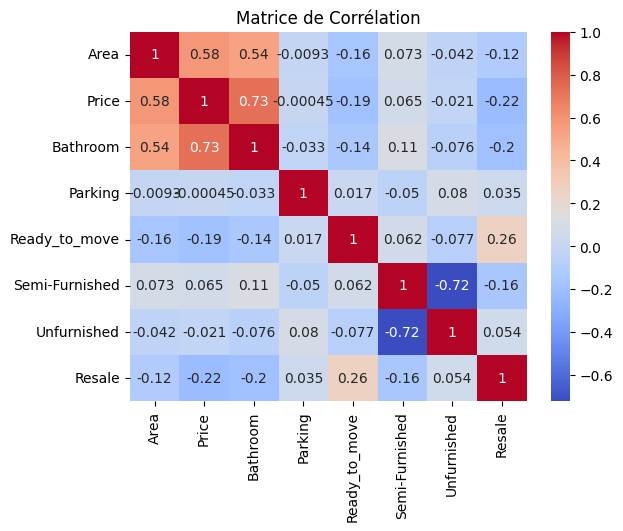

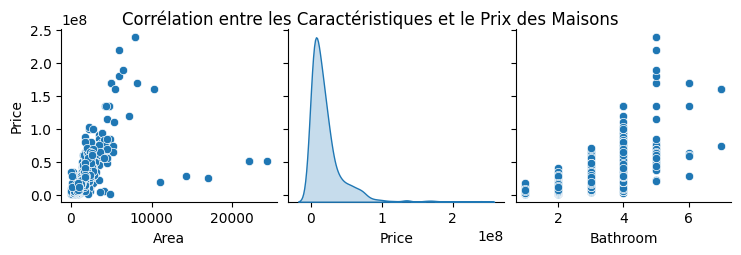

In [23]:
import matplotlib.pyplot as plt
# Matrice de corrélation
correlation_matrix = sub_delhi.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Graphiques de dispersion
sns.pairplot(sub_delhi, x_vars=['Area','Price','Bathroom'],
             y_vars=['Price'], kind='scatter', diag_kind='kde')
plt.suptitle('Corrélation entre les Caractéristiques et le Prix des Maisons')
plt.show()


In [24]:
sub_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            1259 non-null   float64
 1   Price           1259 non-null   int64  
 2   Bathroom        1257 non-null   float64
 3   Parking         1226 non-null   float64
 4   Ready_to_move   1259 non-null   bool   
 5   Semi-Furnished  1259 non-null   bool   
 6   Unfurnished     1259 non-null   bool   
 7   Resale          1259 non-null   bool   
dtypes: bool(4), float64(3), int64(1)
memory usage: 44.4 KB


In [25]:
sub_delhi.isna().sum()

,0
Area,0
Price,0
Bathroom,2
Parking,33
Ready_to_move,0
Semi-Furnished,0
Unfurnished,0
Resale,0


In [26]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
#gestion des valeurs nulles
sub_delhi['Bathroom'].fillna(sub_delhi['Bathroom'].mean(),inplace=True)
sub_delhi['Parking'].fillna(sub_delhi['Parking'].mean(),inplace=True)

In [28]:
# preparation
X= sub_delhi[['Area','Bathroom','Parking','Ready_to_move','Semi-Furnished','Unfurnished','Resale']]
y=sub_delhi['Price']

# Division des données en ensembles d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#Modelisation
# Création du modèle de régression linéaire multiple
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Prédiction des prix des maisons sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE et du R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("Coefficient de détermination (R²) :", r2)

RMSE : 18048838.88510768
Coefficient de détermination (R²) : 0.5692366830091982


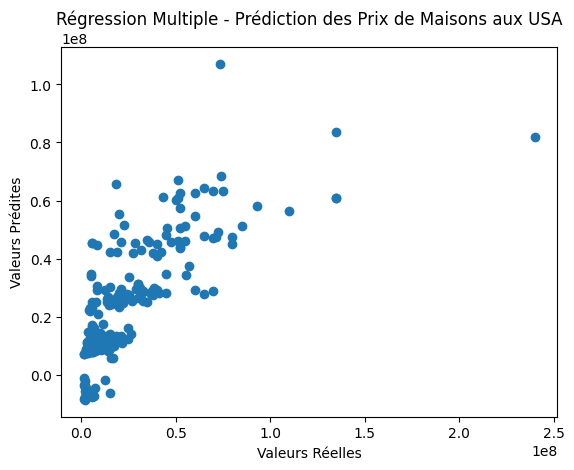

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Régression Multiple - Prédiction des Prix de Maisons aux USA')
plt.show()